In [1]:
import pandas as pd
import pmdarima as pm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('data_inflasi.csv', sep=';')
print(df)

       Bulan  Inflasi
0    2011-01   0.0702
1    2011-02   0.0684
2    2011-03   0.0665
3    2011-04   0.0616
4    2011-05   0.0598
..       ...      ...
151  2023-08   0.0327
152  2023-09   0.0228
153  2023-10   0.0256
154  2023-11   0.0286
155  2023-12   0.0261

[156 rows x 2 columns]


In [8]:
# Ensure 'Bulan' is datetime and set as index
df['Bulan'] = pd.to_datetime(df['Bulan'])
df = df.set_index('Bulan')
df.index

DatetimeIndex(['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01',
               ...
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01',
               '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', name='Bulan', length=156, freq=None)

In [12]:
train_size = len(df) - 12
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

print(f"Jumlah data training: {len(train_data)}")
print(f"Jumlah data testing: {len(test_data)}")

Jumlah data training: 144
Jumlah data testing: 12


In [14]:
seasonal_model = pm.auto_arima(train_data['Inflasi'],
                               start_p=1, start_q=1,
                               test='adf',       # menggunakan ADF test untuk menentukan 'd'
                               max_p=2, max_q=2,
                               m=12,             # Seasonality: 12 bulan
                               start_P=0,
                               d=None,           # Let auto_arima determine 'd'
                               D=None,           # Let auto_arima determine 'D'
                               trace=True,
                               error_action='ignore',
                               suppress_warnings=True,
                               stepwise=True)
results = seasonal_model.fit(train_data['Inflasi'])
print(results.summary())

c:\Users\YOGA\forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\YOGA\forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\YOGA\forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\YOGA\forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\YOGA\forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed 

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=-1136.583, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-1086.205, Time=0.04 sec


c:\Users\YOGA\forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\YOGA\forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-1110.636, Time=0.27 sec


c:\Users\YOGA\forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-1139.678, Time=0.69 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-1088.149, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=-1095.373, Time=0.12 sec


c:\Users\YOGA\forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\YOGA\forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\YOGA\forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=-1129.249, Time=0.18 sec


c:\Users\YOGA\forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=-1120.943, Time=0.66 sec


c:\Users\YOGA\forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=-1113.434, Time=0.35 sec


c:\Users\YOGA\forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=-1138.433, Time=1.43 sec


c:\Users\YOGA\forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=-1130.919, Time=0.33 sec


c:\Users\YOGA\forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=-1138.260, Time=0.42 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=-1135.194, Time=0.14 sec


c:\Users\YOGA\forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\YOGA\forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=-1134.614, Time=0.29 sec
 ARIMA(0,1,1)(0,0,1)[12]             : AIC=-1138.451, Time=0.19 sec

Best model:  ARIMA(0,1,1)(0,0,1)[12] intercept
Total fit time: 5.527 seconds


c:\Users\YOGA\forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\YOGA\forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 12)   Log Likelihood                 573.839
Date:                            Wed, 28 May 2025   AIC                          -1139.678
Time:                                    09:58:13   BIC                          -1127.826
Sample:                                01-01-2011   HQIC                         -1134.862
                                     - 12-01-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0002      0.000     -1.173      0.241      -0.001       0.000
ma.L1          0.2567      0.053   

c:\Users\YOGA\forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


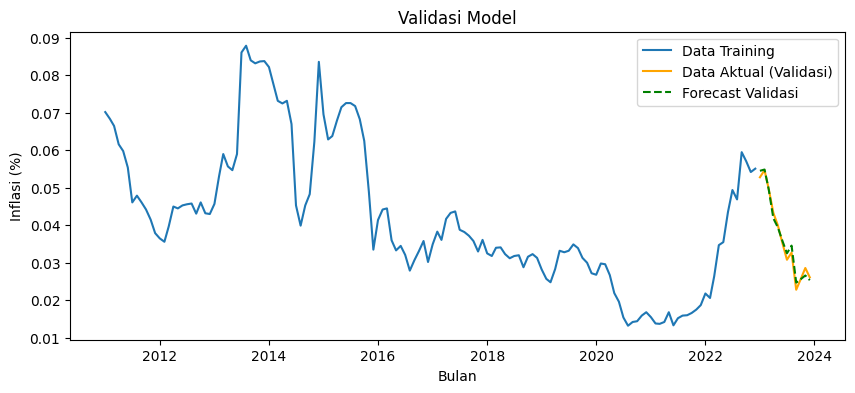

In [24]:
forecast_validation = seasonal_model.predict(n_periods=len(test_data))
forecast_validation_series = pd.Series(forecast_validation, index=test_data.index)

plt.figure(figsize=(10, 4))
plt.plot(train_data.index, train_data['Inflasi'], label='Data Training')
plt.plot(test_data.index, test_data['Inflasi'], label='Data Aktual (Validasi)', color='orange')
plt.plot(forecast_validation_series.index, forecast_validation_series, label='Forecast Validasi', color='green', linestyle='--')
plt.title('Validasi Model')
plt.xlabel('Bulan')
plt.ylabel('Inflasi (%)')
plt.legend()
plt.show()

In [18]:
full_model = pm.auto_arima(df['Inflasi'],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=2, max_q=2,
                           m=12,
                           start_P=0,
                           d=None,
                           D=None,
                           trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)
full_results = full_model.fit(df['Inflasi'])

print(full_results.summary())

c:\Users\YOGA\forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\YOGA\forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\YOGA\forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\YOGA\forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\YOGA\forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed 

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=-1247.066, Time=0.82 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-1181.277, Time=0.04 sec


c:\Users\YOGA\forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\YOGA\forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-1213.977, Time=0.27 sec


c:\Users\YOGA\forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-1245.980, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-1182.829, Time=0.04 sec


c:\Users\YOGA\forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\YOGA\forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=-1188.983, Time=0.20 sec


c:\Users\YOGA\forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=-1235.502, Time=0.30 sec


c:\Users\YOGA\forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=-1233.598, Time=0.70 sec


c:\Users\YOGA\forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=-1216.132, Time=0.53 sec


c:\Users\YOGA\forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=-1245.557, Time=1.56 sec


c:\Users\YOGA\forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=-1244.918, Time=0.49 sec
 ARIMA(2,1,1)(0,0,1)[12] intercept   : AIC=-1243.407, Time=0.20 sec


c:\Users\YOGA\forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\YOGA\forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=-1243.472, Time=0.38 sec


c:\Users\YOGA\forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=-1238.891, Time=0.27 sec


c:\Users\YOGA\forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=-1245.505, Time=0.66 sec


c:\Users\YOGA\forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=-1246.322, Time=0.47 sec


c:\Users\YOGA\forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=-1241.004, Time=0.30 sec


c:\Users\YOGA\forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,1)[12]             : AIC=-1245.560, Time=0.24 sec

Best model:  ARIMA(1,1,1)(0,0,1)[12] intercept
Total fit time: 7.776 seconds


c:\Users\YOGA\forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  156
Model:             SARIMAX(1, 1, 1)x(0, 0, 1, 12)   Log Likelihood                 628.533
Date:                            Wed, 28 May 2025   AIC                          -1247.066
Time:                                    10:00:57   BIC                          -1231.849
Sample:                                01-01-2011   HQIC                         -1240.885
                                     - 12-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0003      0.000     -1.261      0.207      -0.001       0.000
ar.L1         -0.3229      0.339   

c:\Users\YOGA\forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\YOGA\forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


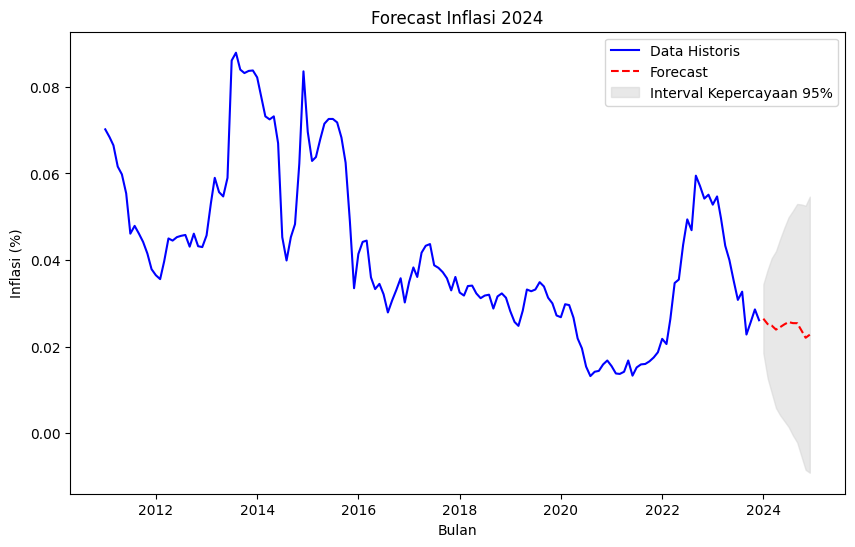

In [23]:
n_forecast_periods = 12 # Untuk 12 bulan di tahun 2024
forecast, conf_int = full_model.predict(n_periods=n_forecast_periods, return_conf_int=True)

last_date = df.index.max()
forecast_index = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=n_forecast_periods, freq='MS')

forecast_series = pd.Series(forecast, index=forecast_index)
lower_bounds = pd.Series(conf_int[:, 0], index=forecast_index)
upper_bounds = pd.Series(conf_int[:, 1], index=forecast_index)

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Inflasi'], label='Data Historis', color='blue')
plt.plot(forecast_series.index, forecast_series, label='Forecast', color='red', linestyle='--')
plt.fill_between(forecast_series.index, lower_bounds, upper_bounds, color='lightgray', alpha=0.5, label='Interval Kepercayaan 95%')
plt.title('Forecast Inflasi 2024')
plt.xlabel('Bulan')
plt.ylabel('Inflasi (%)')
plt.legend()
plt.show()

In [22]:
forecast_df = pd.DataFrame({
    'Bulan': forecast_series.index.strftime('%Y-%m-%d'),
    'Forecast Inflasi (%)': forecast_series.round(4),
    'Lower CI (95%)': lower_bounds.round(4),
    'Upper CI (95%)': upper_bounds.round(4)
})
print(forecast_df)

                 Bulan  Forecast Inflasi (%)  Lower CI (95%)  Upper CI (95%)
2024-01-01  2024-01-01                0.0265          0.0185          0.0344
2024-02-01  2024-02-01                0.0252          0.0127          0.0378
2024-03-01  2024-03-01                0.0249          0.0094          0.0404
2024-04-01  2024-04-01                0.0239          0.0058          0.0421
2024-05-01  2024-05-01                0.0245          0.0042          0.0449
2024-06-01  2024-06-01                0.0252          0.0028          0.0475
2024-07-01  2024-07-01                0.0257          0.0015          0.0499
2024-08-01  2024-08-01                0.0254         -0.0005          0.0514
2024-09-01  2024-09-01                0.0254         -0.0021          0.0530
2024-10-01  2024-10-01                0.0238         -0.0053          0.0528
2024-11-01  2024-11-01                0.0221         -0.0085          0.0526
2024-12-01  2024-12-01                0.0228         -0.0091          0.0546